<a href="https://colab.research.google.com/github/sudhanshu741/AI_Data_Analyst/blob/main/AI_employee_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem

AI Engineer Intern Assignment - Workplete

 Background
Workplete is a leading AI automation company that provides AI employees to users across various industries. Our mission is to revolutionise the workplace by seamlessly integrating AI-powered virtual employees into existing teams and workflows.

 Assignment Overview
As an AI engineer intern at Workplete, your task is to develop a prototype for a new AI employee that specialises in data analysis and reporting. This AI employee should be capable of processing large datasets, identifying trends, and generating insightful reports for the clients.

 Requirements

 1. Data Processing
- Implement a data ingestion module that can handle various file formats (CSV, JSON, Excel)
- Create a data cleaning and preprocessing pipeline

 2. Analysis Engine
- Develop an analysis engine that can identify key trends and patterns in the data
- Implement at least three different statistical or machine learning algorithms for data analysis

 3. Report Generation
- Create a module that can generate comprehensive reports based on the analysis results
- The reports should include visualisations (charts, graphs) and written summaries

 4. User Interaction
- Design a simple command-line interface for users to interact with the AI employee
- Implement basic natural language processing to understand user queries related to the data analysis

 5. Documentation and Testing
- Provide clear documentation for your code and the overall system architecture
- Write unit tests for critical components of your implementation



---




# Report



1.   Data Ingestion
> This is done by load_data function which first read the file format and then checks if the given file format is proper format. Then is converts the file into a pandas dataframe which is used for further processing. If the file is not in desired format it uses try and catch statements to throw a exception, thuw making it more robust to error detection.



  
2.   After loading the dataset our olympis dataset is converted into a dataframe(df).



In [108]:
import pandas as pd
import json
import altair as alt



def load_data(path):
  loaders={
      '.csv':pd.read_csv,
      '.xslx':pd.read_excel,
      '.json':pd.read_json,

  }
  file_extension=path.split('.')[-1]
  load_function=loaders.get(f'.{file_extension}')
  if load_function:
    try:
      return load_function(path)
    except:
      raise ValueError(f"Error loading file: {e}") from e
  else:
    raise ValueError(f'Unsupported file format: {file_extension}')


path='/content/olympics2024.csv'
df=load_data(path)






> We now analyse the first five rows of dataset. We see that it contains columns namely, *Rank, Country, Country Code, Gold, Silver,Bronze, Total*.
We can also see that there are no case of duplicate values as each country wins it own madals



In [109]:
df.head()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64




*  Adding Necessary Cleaning







> Although the data given is clean but in real scenerios data is genrally not clean so we do some basic data preprocessing  to remove duplicates and store it in **df_cleaned** variable





In [110]:
def clean_data(df):
  return df.drop_duplicates()

df_cleaned=clean_data(df)


In [111]:
df_cleaned.head()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64


In [112]:
df.tail()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
86,84,Peru,PER,0,0,1,1
87,84,Qatar,QAT,0,0,1,1
88,84,Singapore,SIN,0,0,1,1
89,84,Slovakia,SVK,0,0,1,1
90,84,Zambia,ZAM,0,0,1,1




> As we can see fron above column, there is no need for cleaning as the previous data and current data are basically same , and we can also not remove any country from our dataset as the country with least amount of medals also adds up to total number of medals present in olympic across all sports.




# Descriptive statistics

> Now we look into the descriptive statistics of our given dataset. Here, we use describe function to look into the min, max, quartile ranges, mean and standard deviation.


> descriptive stats are given by our *describe* function.
*trend* function is used to ind the top performers in the 2024 olympics.
*plot_barchart* gives the barplot of the top five countries that are namely: U.S., China, Great Britain, France and Australia






In [113]:
import matplotlib.pyplot as plt

def describe(df):
  return df.describe()

def trend(df, column='Total', top_n=5):
  return df.nlargest(top_n,column)[['Country',column]]

def plot_barchart(df,x_col,y_col,title,xlabel,ylabel):
  plt.figure(figsize=(10,6))
  plt.bar(df[x_col],df[y_col])
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.xticks(rotation=90)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

def gold_vs_country(df):
  chart=df_filtered=df_cleaned[df_cleaned['Gold']>0]
  alt.Chart(df_filtered).mark_bar().encode(
      alt.X("Country", bin=True),
      alt.Y('Gold', bin=True),
      color=alt.Color(field="Country", type="nominal")
  )
  return chart

def silver_vs_country(df):
  df_filtered = df[df['Silver'] > 0]

  chart=alt.Chart(df_filtered).mark_bar().encode(
    alt.X("Country", bin=True),
    alt.Y('Silver', bin=True),
    color=alt.Color(field="Country", type="nominal")
  )
  return chart

def bronze_vs_country(df):
  df_filtered = df[df['Bronze'] > 0]

  chart=alt.Chart(df_filtered).mark_bar().encode(
    alt.X("Country", bin=True),
    alt.Y('Bronze', bin=True),
    color=alt.Color(field="Country", type="nominal")
  )
  return chart

def country_vs_total(df):
  total_medals_by_country = df.groupby('Country')['Total'].sum()
  total_medals = total_medals_by_country.sum()
  plt.figure(figsize=(8, 8))
  plt.pie(total_medals_by_country, labels=total_medals_by_country.index, autopct='%1.1f%%', startangle=140)
  plt.title(f'Total Medals Won by Countries (Total Medals: {total_medals})')
  plt.show()








> Now, we have obtained a basic descriptive model that ranks the countries based on number of total  nummer medals that a country on the olympic dataset.


> Now, we will use matplotlib and altair library to generate visualisation to get the idea of relationships between various attributes like  total medals v/s country (top five), total gold or silver or bronze medals won by a country.


> We can also find the share of country in the number of medals v/s total medals for olympics .










---

Our next step involvs report generation.


> In this step, we show different statistics as a json format for future reference and ease of understanding.





In [114]:
def report(df):
  content={
      'Descriptive stats': describe(df).to_dict(),
      'top 5 countries': trend(df).to_dict()
  }
  return content



**User Interaction**

Here, we use command-line interface to interact with user

In [120]:
def cli():
  print("Hi!, this is you personal AI employee prototype for Data Analysis")
  file_path=input("Enter your file path")
  try:
    df=load_data(file_path)
    df_cleaned=clean_data(df)
    print("Data loaded successfully")
    choice={
        '1': ('View Descriptive Stats', lambda:print(describe(df_cleaned))),
        '2': ('View Top 5 Countries by Total Medals', lambda: plot_barchart(trend(df_cleaned),'Country','Total','Top 5 Countries by Total Medals', 'Country','Total Medals')),
        '3': ('Gold vs Country', lambda: display(gold_vs_country(df_cleaned))),
        '4': ('Silver vs Country', lambda: display(silver_vs_country(df_cleaned))),
        '5': ('Bronze vs Country', lambda: display(bronze_vs_country(df_cleaned))),
        '6': ('Generate Full Report', lambda: print(json.dumps(report(df_cleaned),indent=4))),
        '7': ('Country vs Total Medals', lambda: country_vs_total(df_cleaned)),
        '8': ('Exit', lambda:None)
    }
    while True:
      print("\nOptions:")
      for key, (description, _) in choice.items():
        print(f"{key}. {description}")
      try:
        option = input("Enter your choice (1/2/3/4/5/6/7/8): ")
        if option in choice:
          choice[option][1]()
          if option == '8':
            break
        else:
          print("Invalid choice")
      except KeyboardInterrupt:
        print("\nInput interrupted. Please enter a valid option or choose '7' to exit.")
  except ValueError as e:
    print(f"Error processing data: {e}")

Hi!, this is you personal AI employee prototype for Data Analysis
Enter your file path/content/olympics2024.csv
Data loaded successfully

Options:
1. View Descriptive Stats
2. View Top 5 Countries by Total Medals
3. Gold vs Country
4. Silver vs Country
5. Bronze vs Country
6. Generate Full Report
7. Country vs Total Medals
8. Exit
Enter your choice (1/2/3/4/5/6/7/8): 1
            Rank       Gold     Silver     Bronze       Total
count  91.000000  91.000000  91.000000  91.000000   91.000000
mean   45.307692   3.604396   3.593407   4.219780   11.417582
std    25.652244   6.990278   6.770816   6.558798   19.702829
min     1.000000   0.000000   0.000000   0.000000    1.000000
25%    23.500000   0.000000   0.000000   1.000000    2.000000
50%    44.000000   1.000000   1.000000   2.000000    5.000000
75%    68.000000   3.000000   3.000000   5.000000    9.000000
max    84.000000  40.000000  44.000000  42.000000  126.000000

Options:
1. View Descriptive Stats
2. View Top 5 Countries by Total M

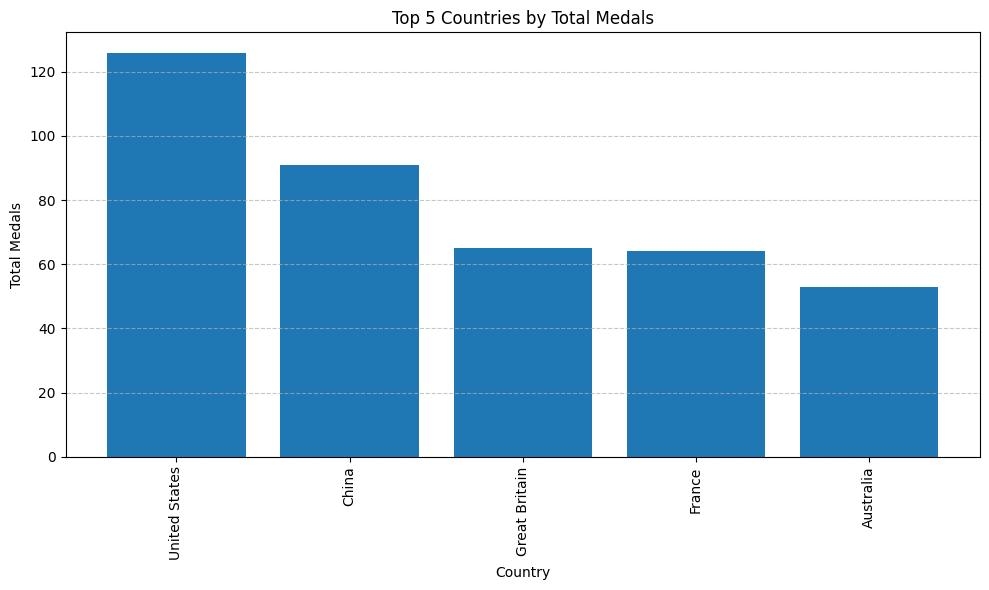


Options:
1. View Descriptive Stats
2. View Top 5 Countries by Total Medals
3. Gold vs Country
4. Silver vs Country
5. Bronze vs Country
6. Generate Full Report
7. Country vs Total Medals
8. Exit
Enter your choice (1/2/3/4/5/6/7/8): 7


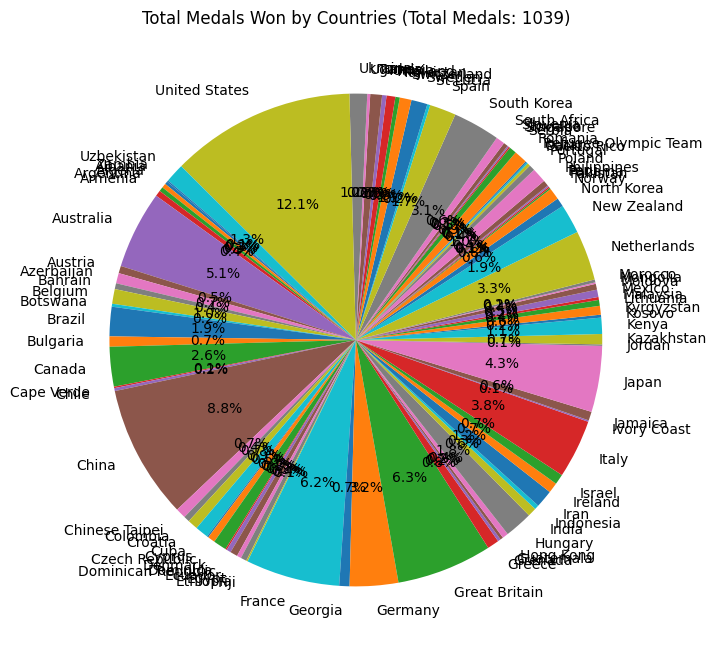


Options:
1. View Descriptive Stats
2. View Top 5 Countries by Total Medals
3. Gold vs Country
4. Silver vs Country
5. Bronze vs Country
6. Generate Full Report
7. Country vs Total Medals
8. Exit
Enter your choice (1/2/3/4/5/6/7/8): 8


In [121]:
if __name__=='__main__':
  cli()

Till now, we have made our prototype for the a new AI employee that specialises in data analysis and reporting.





Now, we will write **unit test** that will test our program for possible bugs that can come at implementation time





In [117]:
!python Test_Data_Analysis.ipynb

Traceback (most recent call last):
  File "/content/Test_Data_Analysis.ipynb", line 160, in <module>
    "execution_count": null,
NameError: name 'null' is not defined
